<a href="https://colab.research.google.com/github/Arshnoor7/Assignment-Advance-Python/blob/main/Assignment_Advance_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------------------------------------
# **Advance Python Assignments**

### **Part I: Process Automation**

Q1. Create a file that contains 1000 lines of random strings.

------------------------------------------------------------------------
# **Advance Python Assignments**
------------------------------------------------------------------------

### **Part I: Process Automation**
Q1. Create a file that contains 1000 lines of random strings

In [1]:
import random
import string

def generate_random_string(length):
    letters = string.ascii_letters
   # return ''.join(random.choice(letters) for _ in range(length))
    return ''.join(random.sample(letters,length))
# Create a file with random strings
with open('random_strings.txt', 'w') as file:
    for i in range(1000):
        random_string = generate_random_string(10)  
        file.write(random_string + '\n')


Q2. Create a file that contains multiple lines of random strings and file size must be 5 MB.

In [3]:
import random
import string
import os

target_file_size = 5 * 1024 * 1024  # 5 MB

def generate_random_string(length):
    letters = string.ascii_letters
    return ''.join(random.choice(letters) for i in range(length))

with open('random_strings.txt', 'w') as file:
    while os.path.getsize('random_strings.txt') < target_file_size:
        random_string = generate_random_string(100)  
        file.write(random_string + '\n')


Q3. Create 10 files that contains multiple lines of random strings and file size of each file must be 5 MB.

In [5]:
import random
import string
import os

target_file_size = 5 * 1024 * 1024  # 5 MB

def generate_random_string(length):
    letters = string.ascii_letters
    return ''.join(random.choice(letters) for _ in range(length))

for file_num in range(1, 11):
    file_name = f'random_strings_{file_num}.txt'
    with open(file_name, 'w') as file:
        while os.path.getsize(file_name) < target_file_size:
            random_string = generate_random_string(100) 
            file.write(random_string + '\n')


Q4. Create 5 files of size 1GB, 2GB, 3GB, 4GB and 5GB; file contains multiple lines of random strings.


In [ ]:
import random
import string
import os

file_sizes = [1, 2, 3, 4, 5]  # Sizes in GB
chunk_size = 1024 * 1024  # 1 MB 

def generate_random_string(length):
    letters = string.ascii_letters
    return ''.join(random.choice(letters) for _ in range(length))

for size in file_sizes:
    file_name = f'random_strings_{size}GB.txt'
    target_file_size = size * 1024 * 1024 * 1024  # Convert GB to bytes

    with open(file_name, 'w') as file:
        while os.path.getsize(file_name) < target_file_size:
            chunk = generate_random_string(50000)
            file.write(chunk)

    print(f'{file_name} created with size {size}GB.')


Q5. Convert all the files of Q4 into upper case one by one.

In [1]:
import random
import string
import os

file_sizes = [1, 2, 3, 4, 5]  # Sizes in GB

for size in file_sizes:
    file_name = f'random_strings_{size}GB.txt'
    
    with open(file_name, 'r+') as file:
        content = file.read().upper()
        file.seek(0)
        file.write(content)
        file.truncate()

Q6. Convert all the files of Q4 into upper case parallel using multi-threading

In [3]:
import os
from concurrent import futures

def convert_to_uppercase(file_name):
    with open(file_name, 'r') as file:
        lines = file.readlines()
    lines = [line.upper() for line in lines]
    with open(file_name, 'w') as file:
        file.writelines(lines)

file_names = ['random_strings_1.txt', 'random_strings_2.txt', 'random_strings_3.txt', 'random_strings_4.txt', 'random_strings_5.txt']

with futures.ThreadPoolExecutor() as executor:
    executor.map(convert_to_uppercase, file_names)


Q7. WAP to automatically download 10 images of cat from “Google Images”. [Hint: Find the package from
pypi.org and use it]

In [5]:
pip install google_images_download

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 104.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 kB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.0 MB/s eta 0:00:00
  Created wheel for google_images_download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14533 sha256=0947eb664468c67f9fed00d91d8487e7b003bfbc7c76354964078d8abc373d2c
  Stored in directory: /root/.cache/pip/wheels/5b/f2/64/0eecb22fee5cbc0321d332492ddcc45b03c6373b5616ee95c8
Successfully built google_images_download


In [ ]:
from google_images_download import google_images_download

downloader = google_images_download.googleimagesdownload()

search_query = "cat"
num_images = 10

arguments = {
    "keywords": search_query,
    "limit": num_images,
    "format": "jpg",
    "output_directory": "cat_images",
}

downloader.download(arguments)


Q8. WAP to automatically download 10 videos of “Machine Learning” from “Youtube.com”. [Hint: Find the
package from pypi.org and use it]

In [28]:
pip install youtube-search-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from youtubesearchpython import VideosSearch
import pytube

search_query = "Machine Learning"
num_videos = 10

search = VideosSearch(search_query, limit=num_videos)

for video in search.result()["result"]:
    try:
        video_url = f"https://www.youtube.com/watch?v={video['id']}"
        youtube = pytube.YouTube(video_url)
        video_stream = youtube.streams.filter(file_extension='mp4', progressive=True).first()
        video_stream.download()
        print(f"Downloaded: {video['title']}")
    except Exception as e:
        print(f"Error downloading video: {video['title']}")
        print(str(e)

Q9. Convert all the videos of Q8 and convert it to audio.

In [9]:
pip install moviepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import os
from moviepy.editor import VideoFileClip

video_files = [file for file in os.listdir() if file.endswith(".mp4")]

for video_file in video_files:
    try:
     
        video = VideoFileClip(video_file)

        audio_file = os.path.splitext(video_file)[0] + ".mp3"

        video.audio.write_audiofile(audio_file)

        print(f"Converted {video_file} to {audio_file}")

        video.close()
        
    except Exception as e:
        print(f"Error converting {video_file}: {str(e)}")


Q10. Create an automated pipeline using multi-threading for:

“Automatic Download of 100 Videos from YouTube” → “Convert it to Audio”

In [25]:
pip install youtube-search-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
pip install pytube

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
pip install pydub


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import threading
from youtubesearchpython import VideosSearch
import pytube
from pydub import AudioSegment

def download_video(video_id):
    youtube = pytube.YouTube(f"https://www.youtube.com/watch?v={video_id}")
    youtube.streams.get_highest_resolution().download()

def convert_to_audio(video_title):
    video_file = f"{video_title}.mp4"
    audio_file = f"{video_title}.mp3"

    video = AudioSegment.from_file(video_file, format='mp4')
    video.export(audio_file, format='mp3')
    video.close()
    os.remove(video_file)

def automate_pipeline():
    search_query = "Machine Learning"
    num_videos = 100

    search = VideosSearch(search_query, limit=num_videos)
    videos = search.result()["result"]

    threads = []
    for video in videos:
        video_id = video['id']
        video_title = video['title']

        download_thread = threading.Thread(target=download_video, args=(video_id,))
        threads.append(download_thread)
        download_thread.start()

        conversion_thread = threading.Thread(target=convert_to_audio, args=(video_title,))
        threads.append(conversion_thread)
        conversion_thread.start()

    for thread in threads:
        thread.join()

    print("Pipeline completed successfully!")

automate_pipeline()


Q11. Create an automated pipeline using multi-threading for: “Automatic Download of 500 images of Dog from
GoogleImages” → “Rescale it to 50%”.

In [16]:
pip install google_images_download

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import threading
from google_images_download import google_images_download
from PIL import Image
import os

def download_images(query, limit):
    response = google_images_download.googleimagesdownload()
    arguments = {"keywords": query, "limit": limit, "format": "jpg", "output_directory": "images"}
    response.download(arguments)

def rescale_images():
    for filename in os.listdir("images"):
        image_path = os.path.join("images", filename)
        if os.path.isfile(image_path):
            try:
                img = Image.open(image_path)
                width, height = img.size
                new_width = int(width * 0.5)
                new_height = int(height * 0.5)
                resized_img = img.resize((new_width, new_height))
                resized_img.save(image_path)
                print(f"Rescaled: {filename}")
            except Exception as e:
                print(f"Error rescaling image: {filename}")
                print(str(e))

def automate_pipeline():
    search_query = "dog"
    num_images = 500

    download_threads = []
    download_thread = threading.Thread(target=download_images, args=(search_query, num_images))
    download_threads.append(download_thread)
    download_thread.start()

    download_thread.join()

    rescale_threads = []
    for _ in range(num_images):
        rescale_thread = threading.Thread(target=rescale_images)
        rescale_threads.append(rescale_thread)
        rescale_thread.start()

    for thread in rescale_threads:
        thread.join()

automate_pipeline()


## **Part II: Data Analytics**
Q12. Create a random dataset of 100 rows and 30 columns. All the values are defined between [1,200]. Perform
the following operations:

(i) Replace all the values with NA in the dataset defined between [10, 60]. Print the count of number
rows having missing values.

(ii) Replace all the NA values with the average of the column value.

(iii) Find the Pearson correlation among all the columns and plot heat map. Also select those columns
having correlation <=0.7.

(iv) Normalize all the values in the dataset between 0 and 10.

(v) Replace all the values in the dataset with 1 if value <=0.5 else with 0.


Number of rows with missing values: 1530


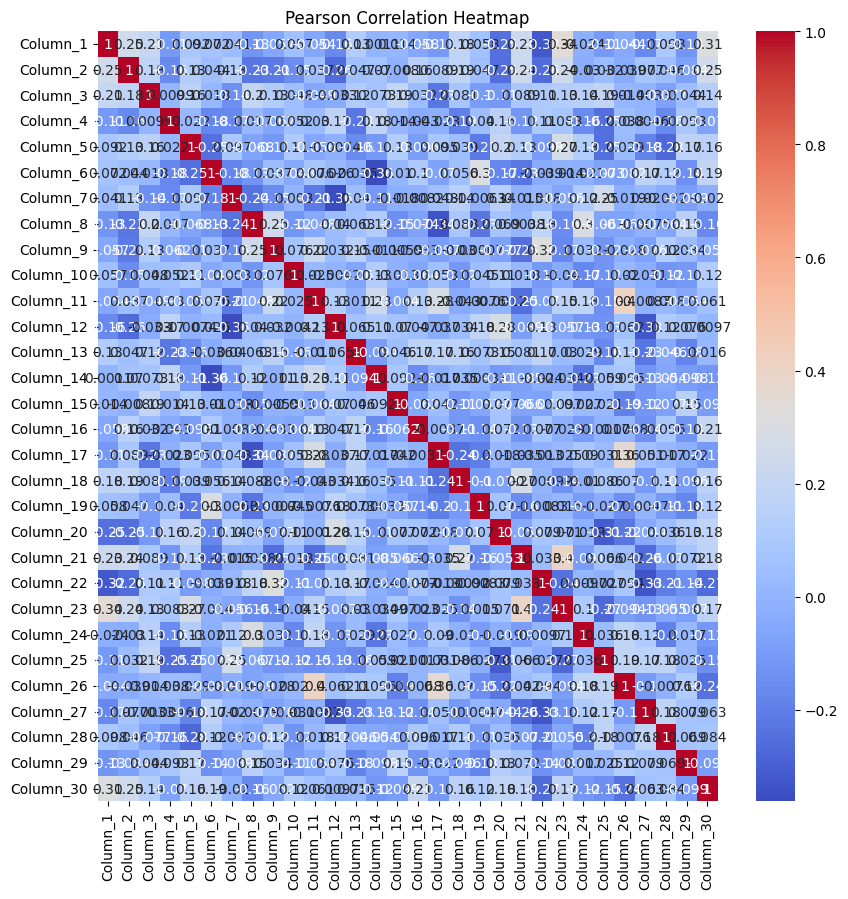

Columns with correlation <= 0.7: 


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

dataset = pd.DataFrame(np.random.randint(1, 201, size=(100, 30)), columns=[f"Column_{i}" for i in range(1, 31)])
print(dataset.head())

dataset.loc[10:60] = np.nan
missing_rows_count = dataset.isna().sum(axis=1).sum()
print(f"Number of rows with missing values: {missing_rows_count}")

dataset = dataset.fillna(dataset.mean())
print(dataset)

correlation = dataset.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Pearson Correlation Heatmap")
plt.show()

low_correlation_columns = correlation.columns[correlation.max() <= 0.7]
print(f"Columns with correlation <= 0.7: {', '.join(low_correlation_columns)}")

dataset_normalized = (dataset - dataset.min()) * 10 / (dataset.max() - dataset.min())
print(dataset_normalized)

dataset_binary = dataset.applymap(lambda x: 1 if x <= 0.5 else 0)
print(dataset_binary)

Q13. Create a random dataset of 500 rows and 10 columns.

Columns 1 to 4 are defined between [-10, 10];

Columns 5 to 8 are defined between [10, 20];

Columns 9 to 10 are defined between [-100, 100].

Apply following clustering algorithms; determine the optimal number of clusters and plot distance metric
graph using each algorithm.

(i) K-Mean clustering

(ii) Hierarchical clustering

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(



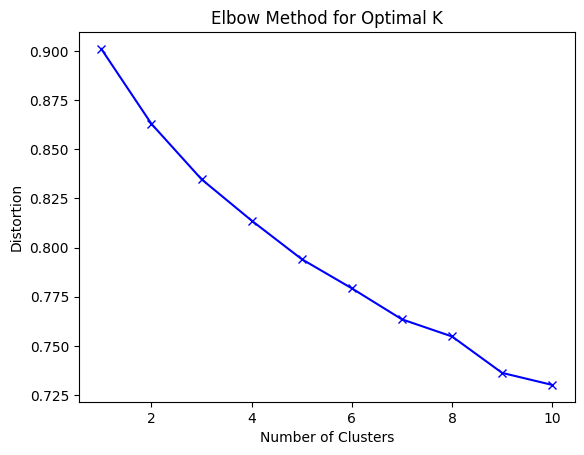

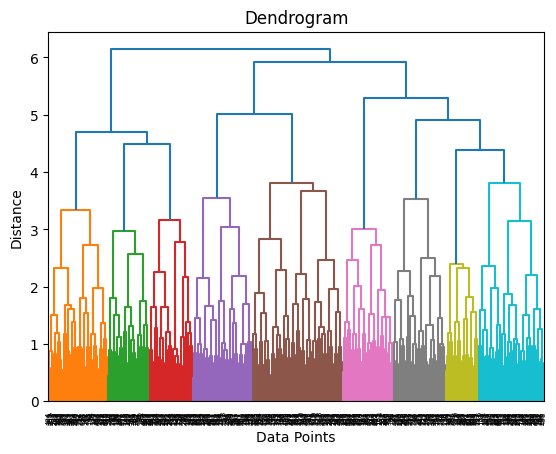

In [33]:
import numpy as np
import pandas as pd
import random as r
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage

data = pd.DataFrame(np.random.uniform(low=-10, high=10, size=(500, 4)), columns=['Column1', 'Column2', 'Column3', 'Column4'])
data = pd.concat([data, pd.DataFrame(np.random.uniform(low=10, high=20, size=(500, 4)), columns=['Column5', 'Column6', 'Column7', 'Column8'])], axis=1)
data = pd.concat([data, pd.DataFrame(np.random.uniform(low=-100, high=100, size=(500, 2)), columns=['Column9', 'Column10'])], axis=1)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

distortions = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    distortions.append(sum(np.min(cdist(scaled_data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / scaled_data.shape[0])

plt.plot(k_range, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show()

linked = linkage(scaled_data, method='ward')
dendrogram(linked)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()


Q14. Create a random dataset of 600 rows and 15 columns. All the values are defined between [-100,100].

Perform the following operations:

(i) Plot scatter graph between Column 5 and Column 6.

(ii) Plot histogram of each column in single graph.

(iii) Plot the Box plot of each column in single graph.


       Column1    Column2    Column3    Column4    Column5    Column6  \
0    -5.854810  60.162787  99.291021  71.699828 -93.347682  68.537974   
1    45.537170  72.209429 -80.570668 -36.324135 -63.143394 -22.826773   
2   -83.525819  69.252862 -93.800133  87.848757 -22.973949 -42.912323   
3    30.946195 -75.200484  55.692631 -16.111046  94.789756  53.600022   
4    13.560674  64.460408  34.519110 -49.969242  67.044873  -3.906072   
..         ...        ...        ...        ...        ...        ...   
595 -72.757639  72.356013   4.407634  44.100536 -97.971841  23.017723   
596  45.018851 -24.863393 -40.574442  97.264813  92.416127 -66.894918   
597  18.178557  43.153022 -23.038764 -42.225794 -47.036538 -50.674652   
598  67.679024  -2.037721 -43.755453  61.935985   3.068761 -93.303399   
599 -97.139334 -37.902190 -97.363887 -82.676446   1.923865  47.945033   

       Column7    Column8    Column9   Column10   Column11   Column12  \
0   -47.756144  53.245644 -25.840898  93.946276  1

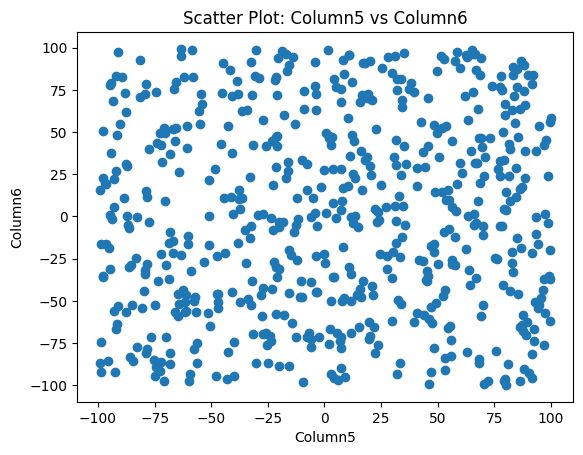

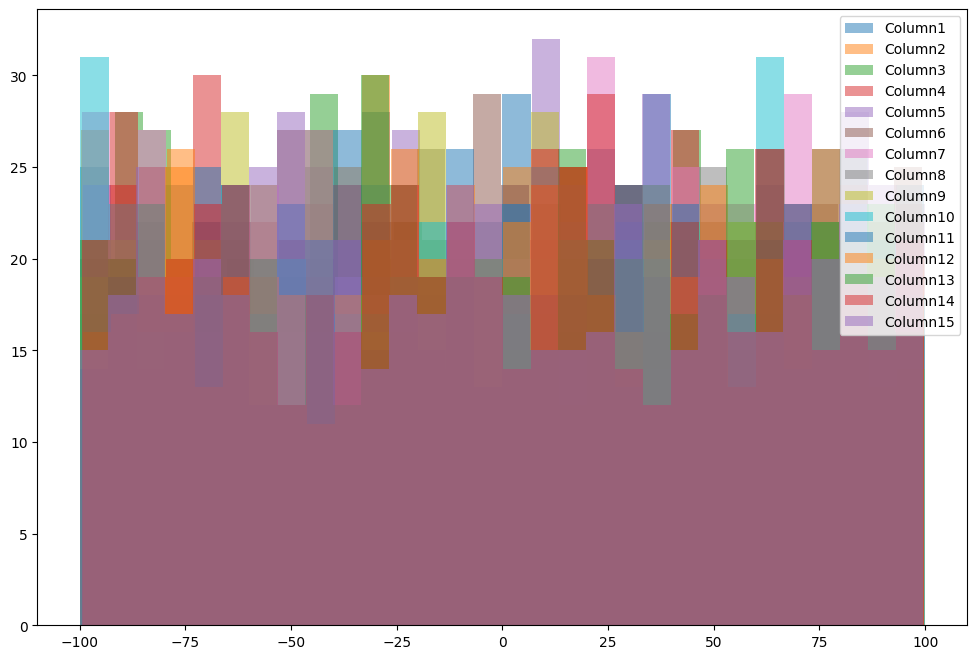

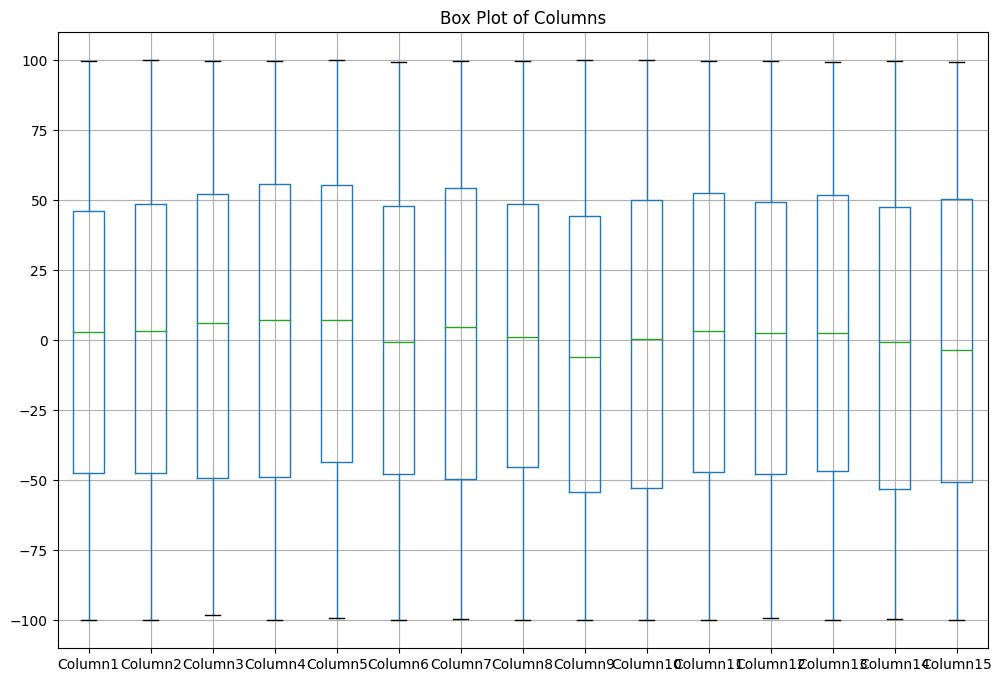

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame(np.random.uniform(low=-100, high=100, size=(600, 15)), columns=[f"Column{i+1}" for i in range(15)])
print(data)
plt.scatter(data['Column5'], data['Column6'])
plt.xlabel('Column5')
plt.ylabel('Column6')
plt.title('Scatter Plot: Column5 vs Column6')
plt.show()

plt.figure(figsize=(12, 8))
for column in data.columns:
    plt.hist(data[column], bins=30, alpha=0.5, label=column)

plt.legend()
plt.show()

data.boxplot(figsize=(12, 8))
plt.title('Box Plot of Columns')
plt.show()


Q15. Create a random dataset of 500 rows and 5 columns:

All the values are defined between [5,10].

Perform the following operations:

(i) Perform t-Test on each column.

(ii) Perform Wilcoxon Signed Rank Test on each column.

(iii) Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4

In [5]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, ranksums

data = pd.DataFrame(np.random.uniform(low=5, high=10, size=(500, 5)), columns=['Column1', 'Column2', 'Column3', 'Column4', 'Column5'])

for column in data.columns:
    t_stat, p_value = ttest_1samp(data[column], 5.0)
    print(f"t-Test for {column}: t-statistic = {t_stat}, p-value = {p_value}")

for column in data.columns:
    statistic, p_value = wilcoxon(data[column] - 5.0)
    print(f"Wilcoxon Signed Rank Test for {column}: statistic = {statistic}, p-value = {p_value}")

t_stat, p_value = ttest_ind(data['Column3'], data['Column4'])
print(f"Two Sample t-Test for Column3 and Column4: t-statistic = {t_stat}, p-value = {p_value}")

statistic, p_value = ranksums(data['Column3'], data['Column4'])
print(f"Wilcoxon Rank Sum Test for Column3 and Column4: statistic = {statistic}, p-value = {p_value}")


t-Test for Column1: t-statistic = 40.1165552935323, p-value = 2.9110323221842798e-158
t-Test for Column2: t-statistic = 38.511982337491354, p-value = 1.4276956483172773e-151
t-Test for Column3: t-statistic = 40.671712558912255, p-value = 1.5198084875598792e-160
t-Test for Column4: t-statistic = 38.580783724599755, p-value = 7.326192513901262e-152
t-Test for Column5: t-statistic = 38.210455949646985, p-value = 2.676431054610715e-150
Wilcoxon Signed Rank Test for Column1: statistic = 0.0, p-value = 1.2647189486921487e-83
Wilcoxon Signed Rank Test for Column2: statistic = 0.0, p-value = 1.2647189486921487e-83
Wilcoxon Signed Rank Test for Column3: statistic = 0.0, p-value = 1.2647189486921487e-83
Wilcoxon Signed Rank Test for Column4: statistic = 0.0, p-value = 1.2647189486921487e-83
Wilcoxon Signed Rank Test for Column5: statistic = 0.0, p-value = 1.2647189486921487e-83
Two Sample t-Test for Column3 and Column4: t-statistic = 0.6990643238233304, p-value = 0.4846747140665696
Wilcoxon Rank